# Projeto 4 - Titanic - Irá sobreviver ou não
<img src="https://ibcdn.canaltech.com.br/5uFYyzz-BCXzkZk1OlnDzYs9lc8=/512x288/smart/i248658.jpeg" width="400" height="100"/>

In [50]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import plot_precision_recall_curve
from plotnine import *

In [51]:
df=pd.read_csv('https://raw.githubusercontent.com/massquantity/Kaggle-Titanic/master/Data/train.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [52]:
df['Survived'].drop_duplicates()

0    0
1    1
Name: Survived, dtype: int64

In [53]:
df['Survived'].value_counts()

0    549
1    342
Name: Survived, dtype: int64

# Ver se tem valores fora do padrão

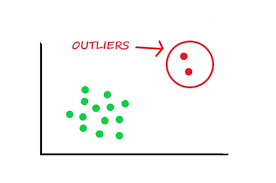

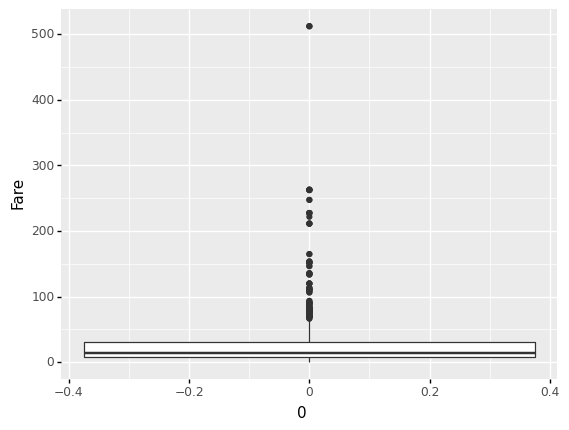

<ggplot: (341084751)>

In [54]:
(
    ggplot(df) +
    geom_boxplot(aes(x = 0 , y='Fare'))
)

# Separar em treino e teste e a variável target das features
<img src="https://i.ibb.co/3csjYT2/image.png" width="400" height="100"/>

In [83]:
x = df.drop(columns=['Survived'],axis=1)
y = df['Survived']

In [84]:
train_x, test_x, train_y, test_y = train_test_split(x,y,test_size=0.2)

# Retirar colunas que não usaremos no nosso modelo

<img src="https://cdn2.iconfinder.com/data/icons/flat-pro-word-processing-set-5/32/table-column-delete-512.png" width="200" height="100"/>

In [85]:
train_x = train_x.drop(columns=['PassengerId','Name', 'Ticket','Cabin'], axis = 1)
test_x = test_x.drop(columns=['PassengerId','Name', 'Ticket','Cabin'], axis = 1)

# Valor Vazio

<img src="https://www.logianalytics.com/wp-content/uploads/2019/06/Missing-values-2.png" width="250" height="100"/>

In [86]:
pd.isna(test_x).sum().to_frame("Valor Vazio")

,Valor Vazio
Pclass,0
Sex,0
Age,39
SibSp,0
Parch,0
Fare,0
Embarked,0


In [87]:
train_x['Age'].fillna(train_x['Age'].mean(), inplace = True)
# USAR A MÉDIA DO TREINO!! 
test_x['Age'].fillna(train_x['Age'].mean(), inplace = True)

train_x['Embarked'].fillna(train_x['Embarked'].mode()[0], inplace = True)
# USAR A MODA DO TREINO!! 
test_x['Embarked'].fillna(train_x['Embarked'].mode()[0], inplace = True)

# Tratar variável numéricas (se tiverem medidas diferentes)

<img src="https://miro.medium.com/max/2134/1*C5XM-0LZSMBd1EEiYZbYxA.png" width="350" height="100"/>

In [88]:
train_x[['Age', 'Fare']] = MinMaxScaler().fit_transform(train_x[['Age', 'Fare']])
test_x[['Age', 'Fare']] = MinMaxScaler().fit_transform(test_x[['Age', 'Fare']])

# Categóricas em numéricas

<img src="https://miro.medium.com/max/1879/1*O_pTwOZZLYZabRjw3Ga21A.png" width="600" height="100"/>

In [89]:
train_x

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
783,3,male,0.402471,1,2,0.045771,S
537,1,female,0.402011,0,0,0.207728,C
602,1,male,0.402471,0,0,0.082759,S
658,2,male,0.306877,0,0,0.025374,S
485,3,female,0.402471,3,1,0.049708,S
...,...,...,...,...,...,...,...
95,3,male,0.402471,0,0,0.015713,S
174,1,male,0.755368,0,0,0.059914,C
381,3,female,0.007883,0,2,0.030726,C
341,1,female,0.320468,3,2,0.513342,S


In [90]:
train_x = pd.get_dummies(train_x, columns=['Pclass','Sex','SibSp','Parch','Embarked'])
test_x = pd.get_dummies(test_x,columns=['Pclass','Sex','SibSp','Parch','Embarked'])
train_x, test_x = train_x.align(test_x, join='inner', axis=1)

## Treinar o modelo com os principais algorítimos supervisionados de Classificação
<img src="https://i.ibb.co/N3pbLFp/LR-LDA-DT-KNN-SVM-RF.png" width="200" height="80"/>

In [91]:
LR = LogisticRegression(solver='lbfgs', max_iter=10000).fit(train_x, train_y)
LDA = LinearDiscriminantAnalysis().fit(train_x, train_y)
DT = DecisionTreeClassifier().fit(train_x, train_y)
KN = KNeighborsClassifier().fit(train_x, train_y)
SVM = SVC().fit(train_x,train_y)
RF = RandomForestClassifier().fit(train_x,train_y)

# Acurácia, Precision e Recall do Treino

In [92]:
metricas = {
        'Accuracy':  [LR.score(train_x,train_y),
                      LDA.score(train_x,train_y),
                      DT.score(train_x,train_y),
                      KN.score(train_x,train_y),
                      SVM.score(train_x,train_y),
                      RF.score(train_x,train_y)],
        'Precision': [precision_score(train_y, LR.predict(train_x)),
                      precision_score(train_y, LDA.predict(train_x)),
                      precision_score(train_y, DT.predict(train_x)),
                      precision_score(train_y, KN.predict(train_x)),
                      precision_score(train_y, SVM.predict(train_x)),
                      precision_score(train_y, RF.predict(train_x))],
        'Recall' :   [recall_score(train_y,LR.predict(train_x)),
                      recall_score(train_y, LDA.predict(train_x)),
                      recall_score(train_y, DT.predict(train_x)),
                      recall_score(train_y, KN.predict(train_x)),
                      recall_score(train_y, SVM.predict(train_x)),
                      recall_score(train_y, RF.predict(train_x))]
        }

dados = pd.DataFrame(metricas, columns = ['Accuracy', 'Precision','Recall'], index=['LR','LDA','DT','KN','SVM','RF'])

dados

,Accuracy,Precision,Recall
LR,0.811798,0.781116,0.686792
LDA,0.804775,0.766949,0.683019
DT,0.981742,1.000000,0.950943
KN,0.849719,0.840517,0.735849
SVM,0.834270,0.884817,0.637736
RF,0.981742,0.984615,0.966038


# Acurácia, Precision e Recall do Teste

In [93]:
metricas = {'Accuracy': [LR.score(test_x,test_y),
                        LDA.score(test_x,test_y),
                        DT.score(test_x,test_y),
                        KN.score(test_x,test_y),
                        SVM.score(test_x,test_y),
                        RF.score(test_x,test_y)],
            'Precision':[precision_score(test_y, LR.predict(test_x)),
                        precision_score(test_y, LDA.predict(test_x)),
                        precision_score(test_y, DT.predict(test_x)),
                        precision_score(test_y, KN.predict(test_x)),
                        precision_score(test_y, SVM.predict(test_x)),
                        precision_score(test_y, RF.predict(test_x))],
            'Recall' : [recall_score(test_y, RF.predict(test_x)),
                        recall_score(test_y, LDA.predict(test_x)),
                        recall_score(test_y, DT.predict(test_x)),
                        recall_score(test_y, KN.predict(test_x)),
                        recall_score(test_y, SVM.predict(test_x)),
                        recall_score(test_y, RF.predict(test_x))]
        }

dados = pd.DataFrame(metricas, columns = ['Accuracy', 'Precision','Recall'], index=['LR','LDA','DT','KN','SVM','RF'])

dados

,Accuracy,Precision,Recall
LR,0.821229,0.835821,0.597403
LDA,0.815642,0.823529,0.727273
DT,0.731844,0.730159,0.597403
KN,0.798883,0.859649,0.636364
SVM,0.787709,0.914894,0.558442
RF,0.737430,0.741935,0.597403


## Matriz de confusão + Métricas
<img src="https://www.researchgate.net/profile/Rune-Jacobsen/publication/334840641/figure/fig3/AS:794222751928321@1566368868347/Confusion-matrix-and-evaluation-metrics.png" width="350" height="80"/>

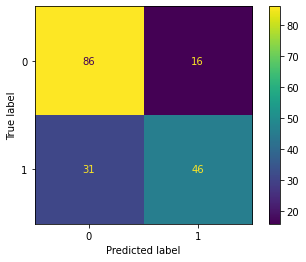

In [94]:
plot_confusion_matrix(RF, test_x, test_y)
plt.show()

## Curva ROC
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/3/36/Roc-draft-xkcd-style.svg/250px-Roc-draft-xkcd-style.svg.png" width="350" height="80"/>

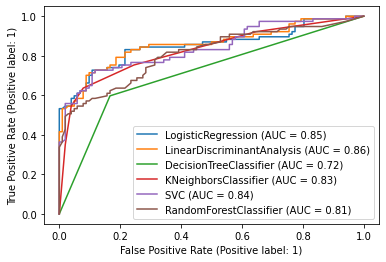

In [95]:
#classifiers = [LR, LDA, DT, KN, SVM, RF]
plot_roc_curve(LR, test_x, test_y, ax=plt.gca())
plot_roc_curve(LDA, test_x, test_y, ax=plt.gca())
plot_roc_curve(DT, test_x, test_y, ax=plt.gca())
plot_roc_curve(KN, test_x, test_y, ax=plt.gca())
plot_roc_curve(SVM, test_x, test_y, ax=plt.gca())
plot_roc_curve(RF, test_x, test_y, ax=plt.gca())

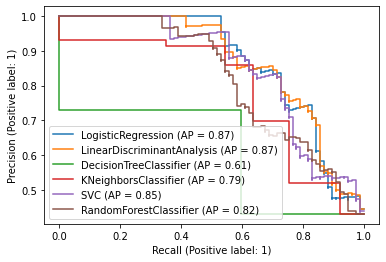

In [96]:
plot_precision_recall_curve(LR, test_x, test_y, ax=plt.gca())
plot_precision_recall_curve(LDA, test_x, test_y, ax=plt.gca())
plot_precision_recall_curve(DT, test_x, test_y, ax=plt.gca())
plot_precision_recall_curve(KN, test_x, test_y, ax=plt.gca())
plot_precision_recall_curve(SVM, test_x, test_y, ax=plt.gca())
plot_precision_recall_curve(RF, test_x, test_y, ax=plt.gca())